In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import pickle

In [54]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.width',None)

In [55]:
df = pd.read_csv('/content/train.csv')
df.head(5)

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38.172746,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47.750517,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,1,7.380373,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,0,23.561927,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,0,43.205790,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [56]:
df.shape

(800, 22)

In [57]:
df.tail()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
795,796,0,1,0,0,0,0,0,0,1,1,16.597187,m,Hispanic,no,no,New Zealand,no,12.999501,18 and more,Self,0
796,797,0,1,1,0,0,1,0,1,1,1,20.703001,m,White-European,no,no,Cyprus,no,13.561518,18 and more,Self,0
797,798,0,0,0,0,0,0,0,0,0,0,5.711481,m,South Asian,yes,no,New Zealand,no,2.653177,18 and more,Self,0
798,799,0,0,0,0,0,0,0,0,0,0,16.414305,f,?,no,no,Canada,no,9.069342,18 and more,Self,0
799,800,0,1,0,0,0,0,0,0,0,0,46.966113,f,?,no,no,United Arab Emirates,yes,2.243304,18 and more,Self,0


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [59]:
df.isna().sum()

,0
ID,0
A1_Score,0
A2_Score,0
A3_Score,0
A4_Score,0
A5_Score,0
A6_Score,0
A7_Score,0
A8_Score,0
A9_Score,0


In [60]:
df.duplicated().sum()

0

In [61]:
df.columns

Index(['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score',
       'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender', 'ethnicity', 'jaundice', 'austim',
       'contry_of_res', 'used_app_before', 'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

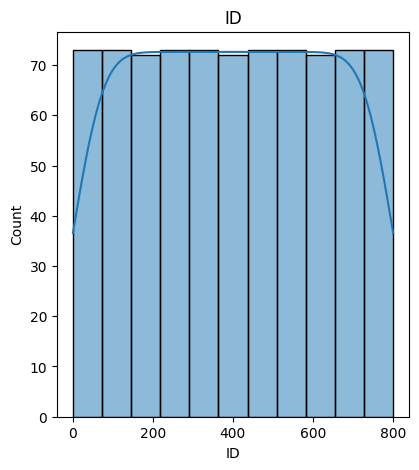

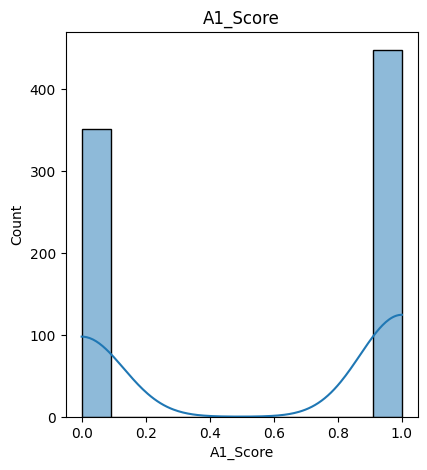

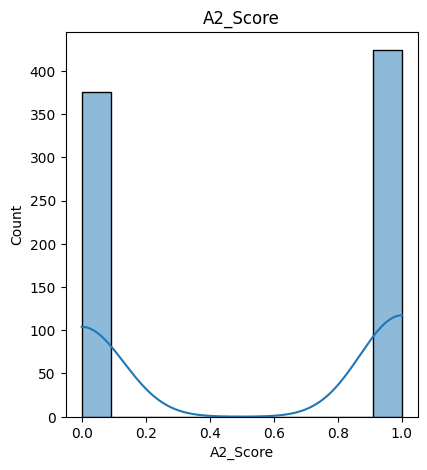

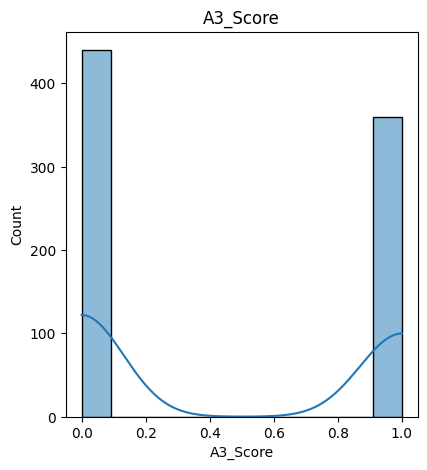

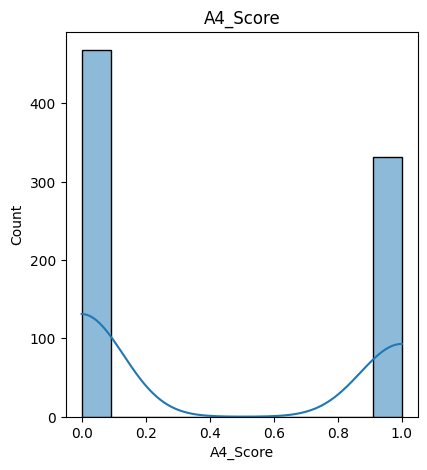

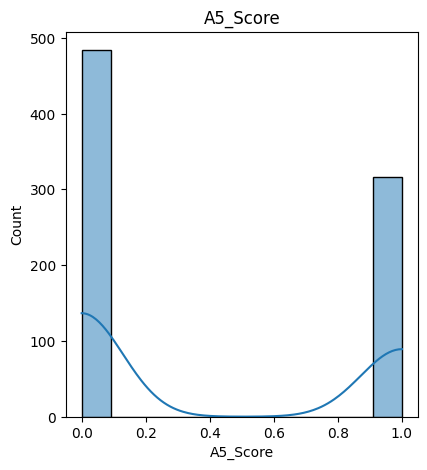

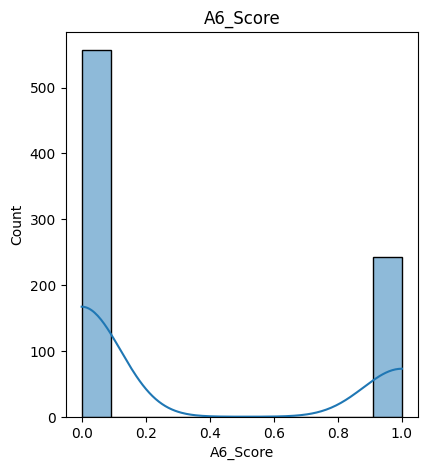

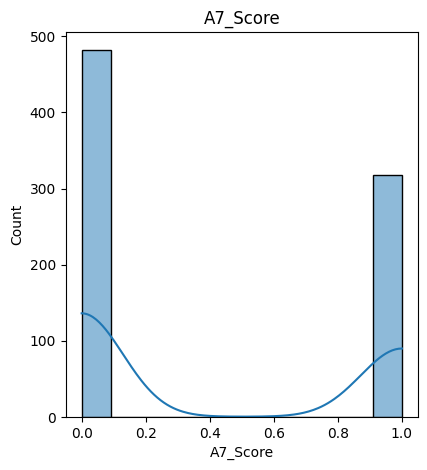

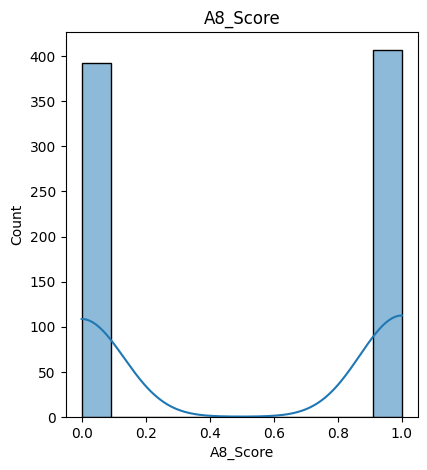

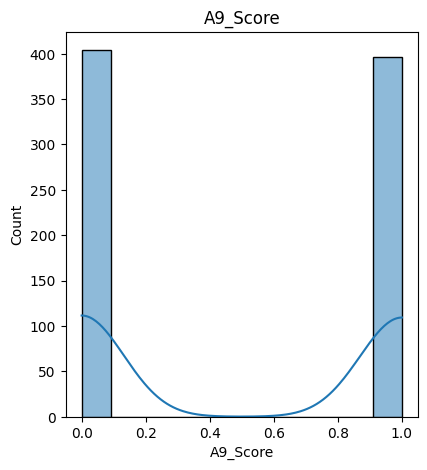

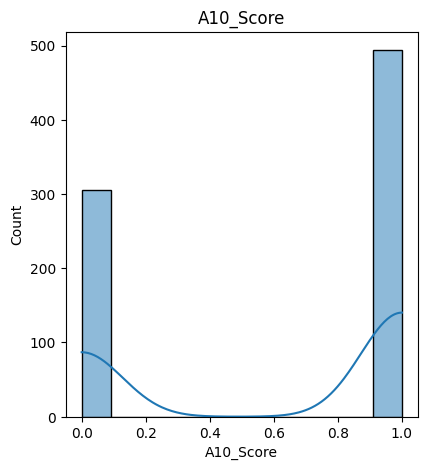

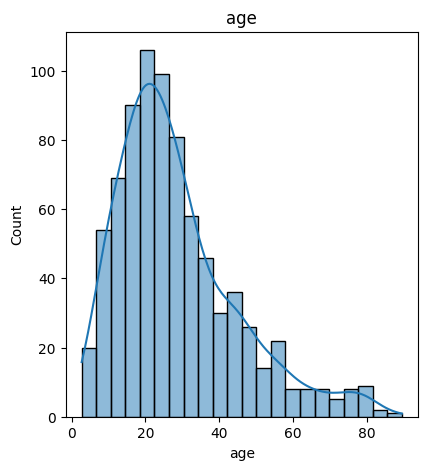

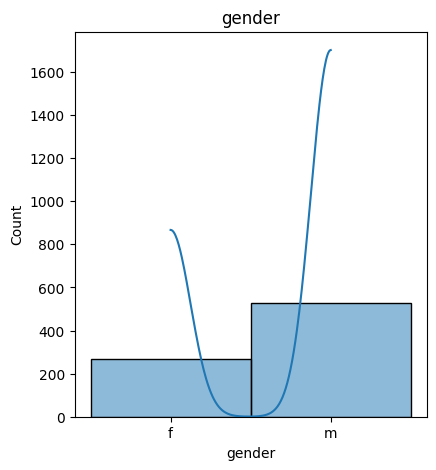

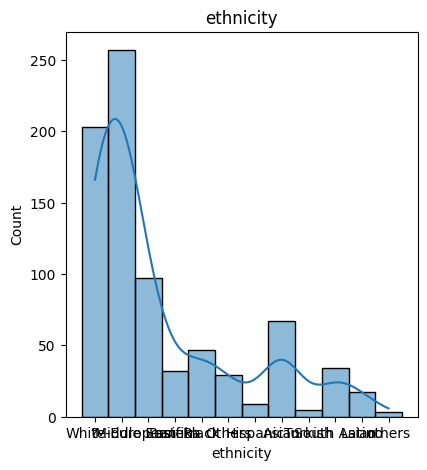

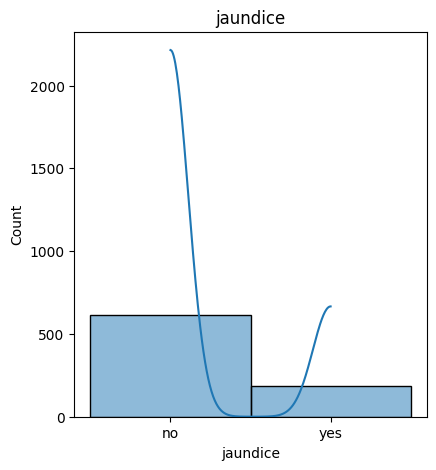

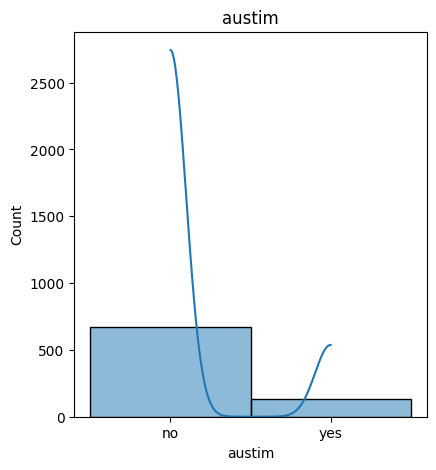

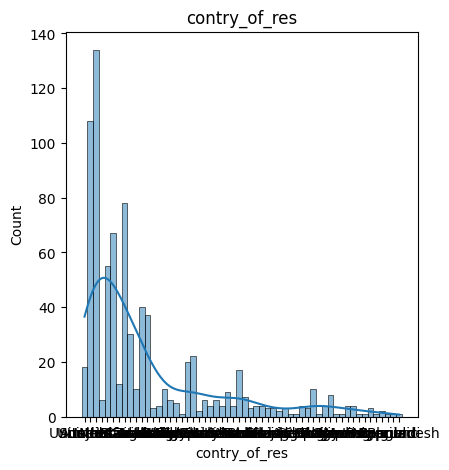

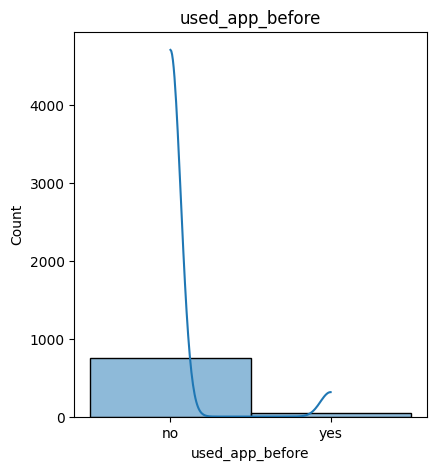

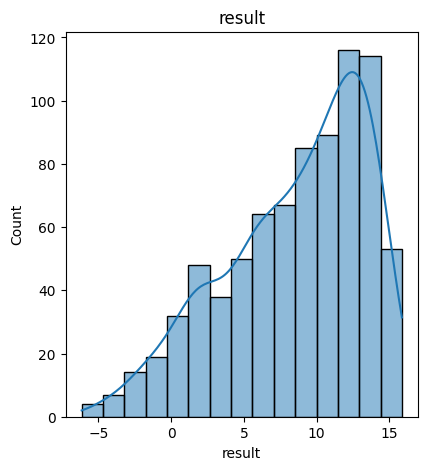

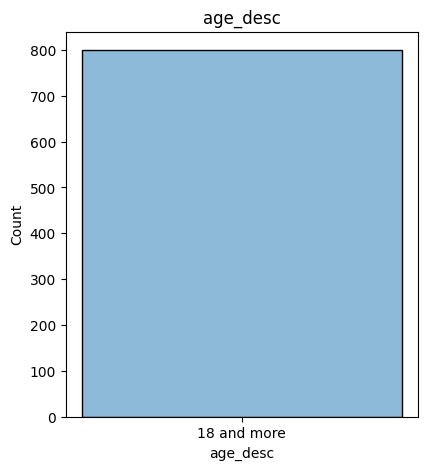

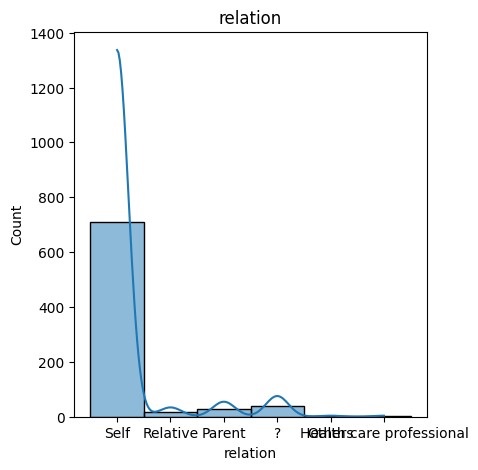

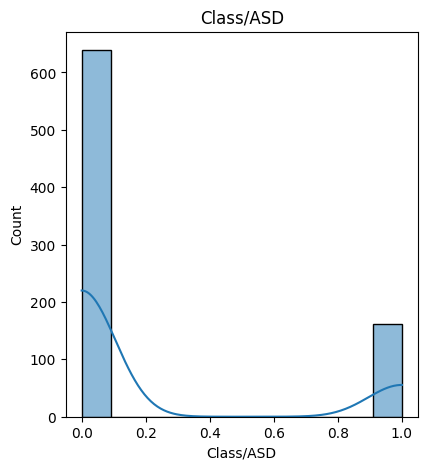

In [62]:
for columns in df.columns:
  plt.figure(figsize=(10,5))
  plt.subplot(1,2,2)
  sns.histplot(df[columns],kde = True)
  plt.title(columns)
  plt.show()

In [63]:
df['age'] = df['age'].astype(int)

In [64]:
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,1,7,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,0,23,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,0,43,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [65]:
for col in df.columns:
  numerical_features = ['ID','age','result']
  if col not in numerical_features:
    print(col, df[col].unique())
    print('.'*50)

A1_Score [1 0]
..................................................
A2_Score [0 1]
..................................................
A3_Score [1 0]
..................................................
A4_Score [0 1]
..................................................
A5_Score [1 0]
..................................................
A6_Score [0 1]
..................................................
A7_Score [1 0]
..................................................
A8_Score [0 1]
..................................................
A9_Score [1 0]
..................................................
A10_Score [1 0]
..................................................
gender ['f' 'm']
..................................................
ethnicity ['?' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Others'
 'Hispanic' 'Asian' 'Turkish' 'South Asian' 'Latino' 'others']
..................................................
jaundice ['no' 'yes']
..................................................
austim

In [66]:
df = df.drop(columns = ['ID','age_desc'])

In [67]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,Self,0
2,1,1,1,1,1,1,1,1,1,1,7,m,White-European,no,yes,United States,no,14.851484,Self,1
3,0,0,0,0,0,0,0,0,0,0,23,f,?,no,no,United States,no,2.276617,Self,0
4,0,0,0,0,0,0,0,0,0,0,43,m,?,no,no,South Africa,no,-4.777286,Self,0


In [68]:
df['contry_of_res'].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Viet Nam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'AmericanSamoa', 'Bahamas', 'Saudi Arabia',
       'Ireland', 'Aruba', 'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan',
       'Armenia', 'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'Hong Kong',
       'Angola', 'China', 'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran',
       'Argentina', 'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone',
       'Czech Republic', 'Niger', 'Romania', 'Cyprus', 'Belgium',
       'Burundi', 'Bangladesh'], dtype=object)

In [69]:
mapping = {
    'Viet Nam': 'Vietnam',
    'AmericanSamoa':'United States',
    'Hong Kong':'China'
}
df['contry_of_res'] = df['contry_of_res'].replace(mapping)

In [70]:
df['Class/ASD'].value_counts()

,count
Class/ASD,
0,639
1,161


In [71]:
df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,27.963750,8.537303,0.201250
std,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.329827,4.807676,0.401185
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,-6.137748,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,5.306575,0.000000
50%,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.000000,9.605299,0.000000
75%,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.250000,12.514484,0.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.000000,15.853126,1.000000


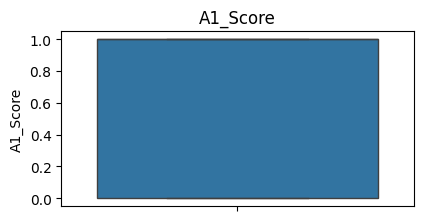

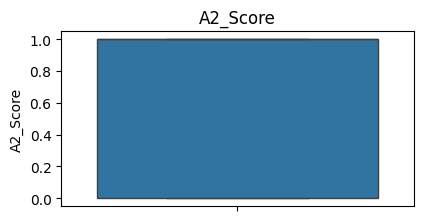

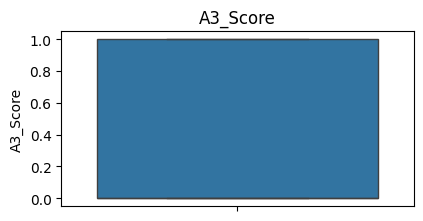

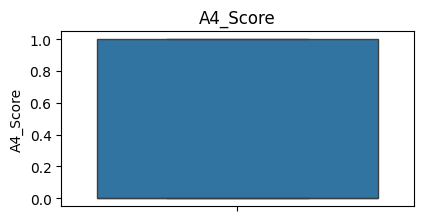

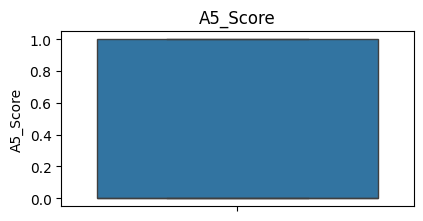

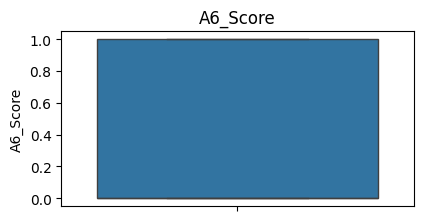

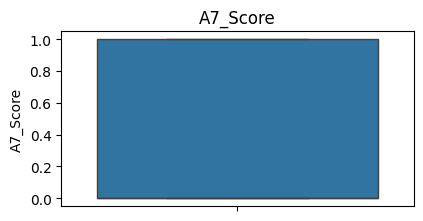

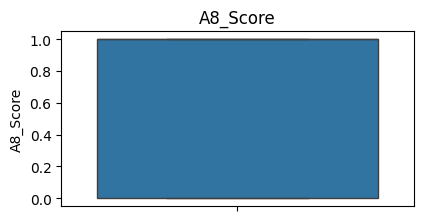

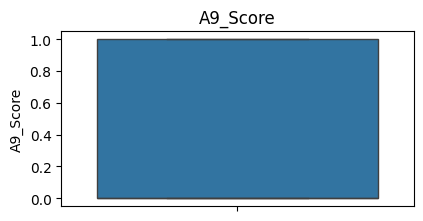

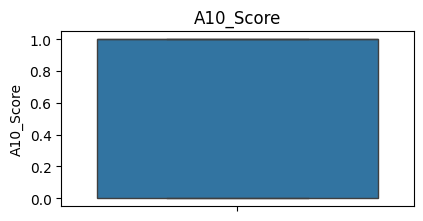

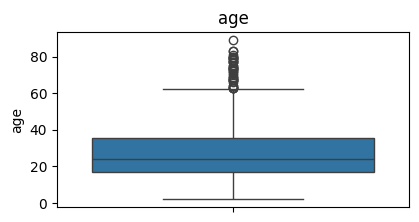

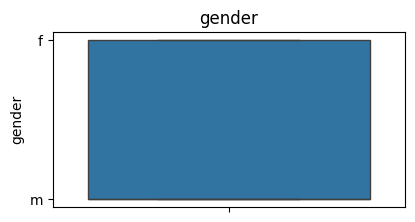

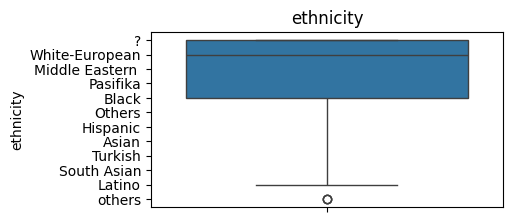

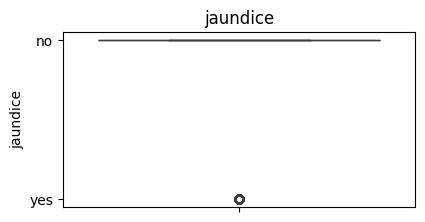

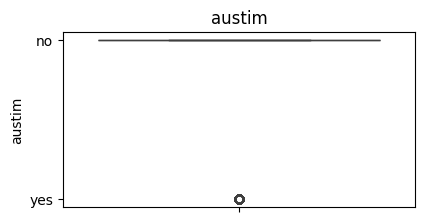

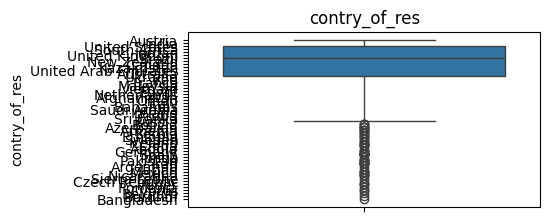

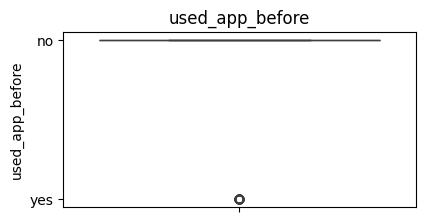

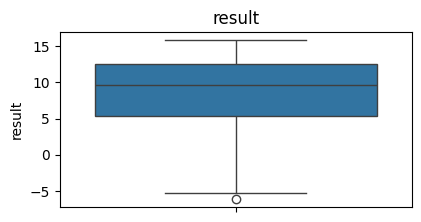

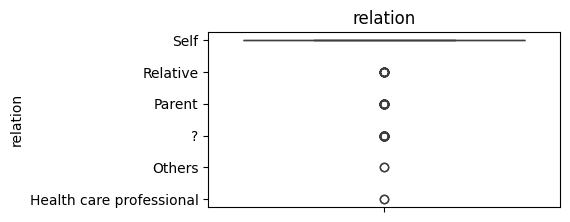

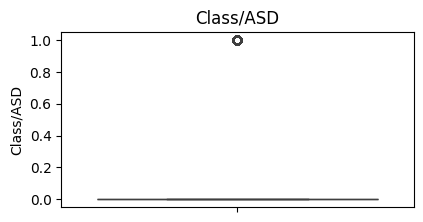

In [72]:
for col in df.columns:
  plt.figure(figsize=(10,5))
  plt.subplot(2,2,1)
  sns.boxplot(df[col])
  plt.title(col)
  plt.show()

In [73]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
age_outliers = df[(df['age'] < lower_bound) | (df['age'] > upper_bound)]

In [74]:
len(age_outliers)

39

In [77]:
Q1 = df['result'].quantile(0.25)
Q3 = df['result'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
result_outliers = df[(df['result'] < lower_bound) | (df['result'] > upper_bound)]

In [78]:
len(result_outliers)

1

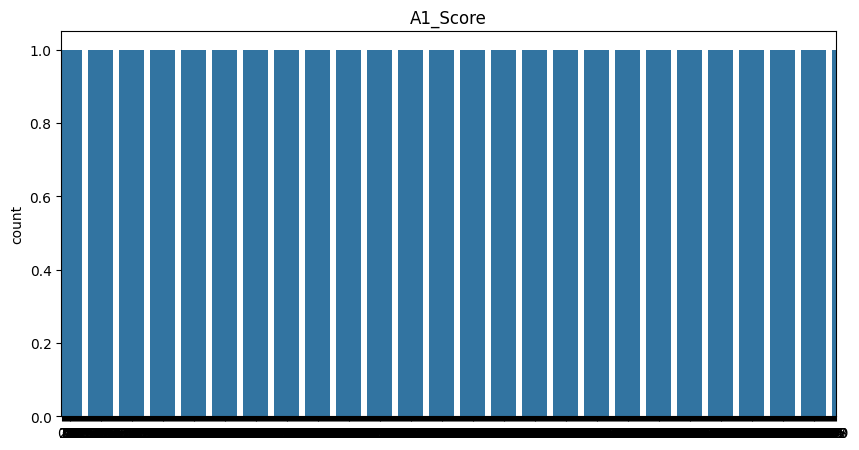

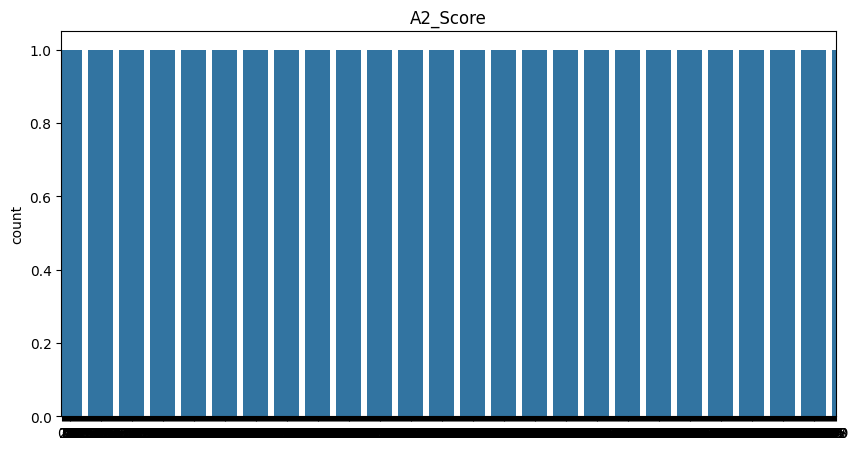

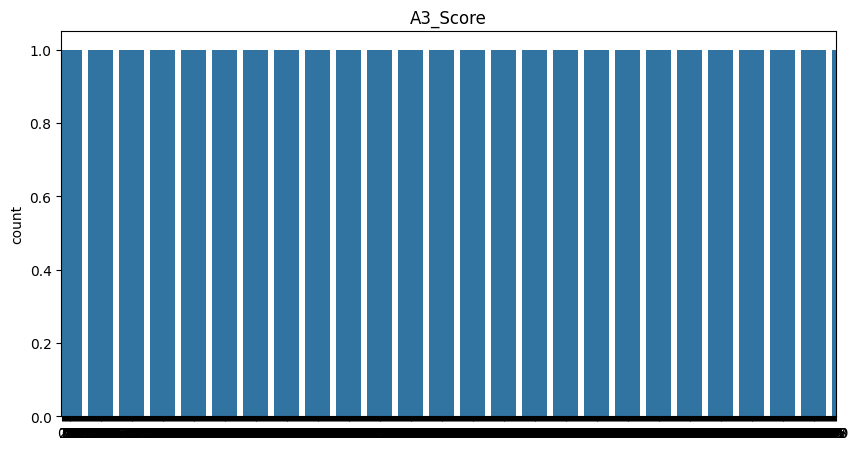

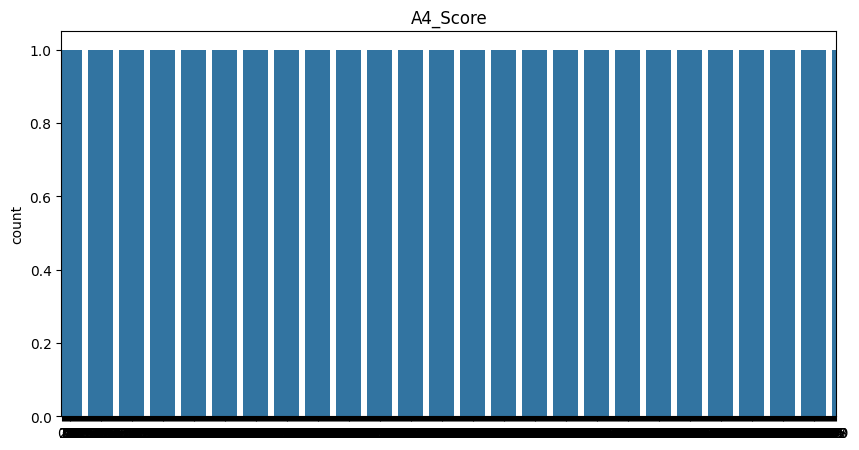

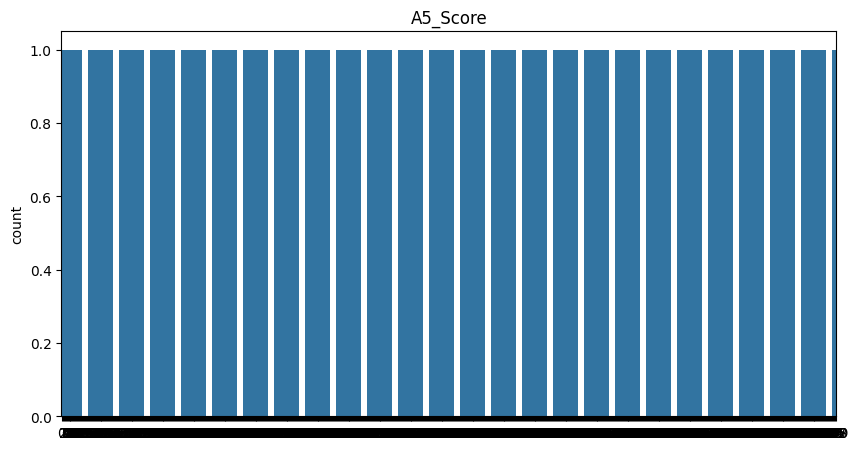

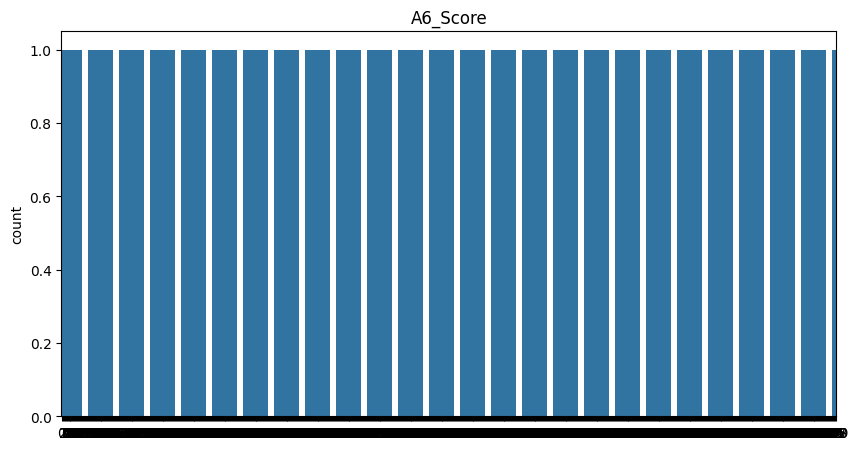

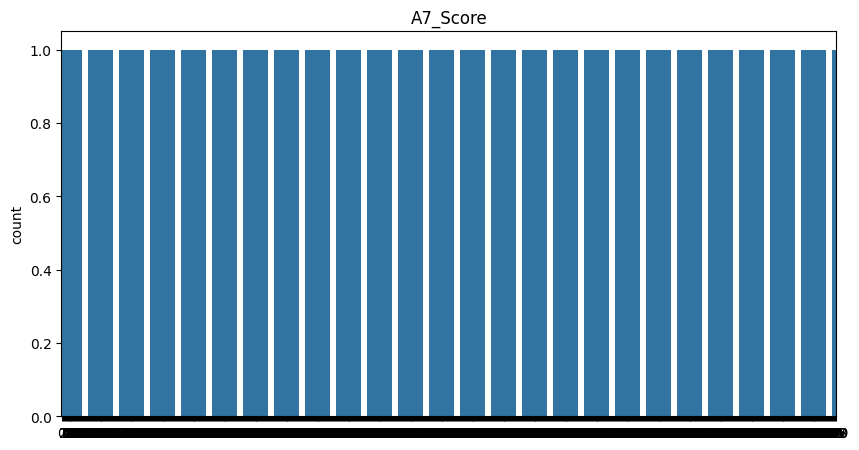

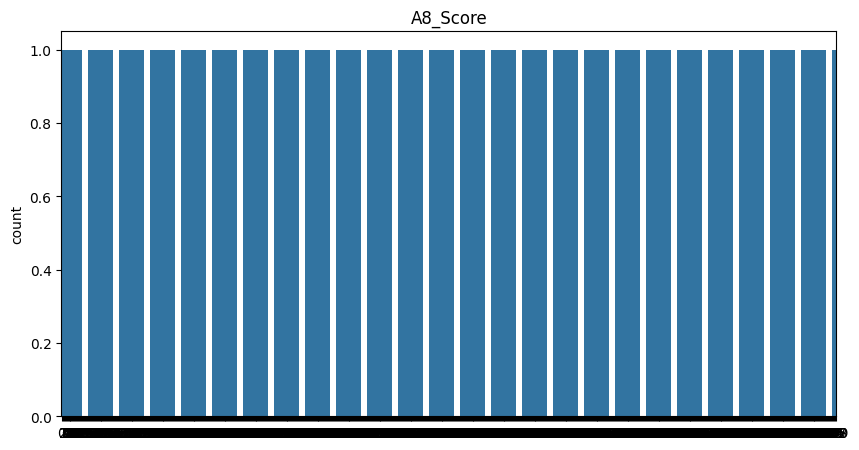

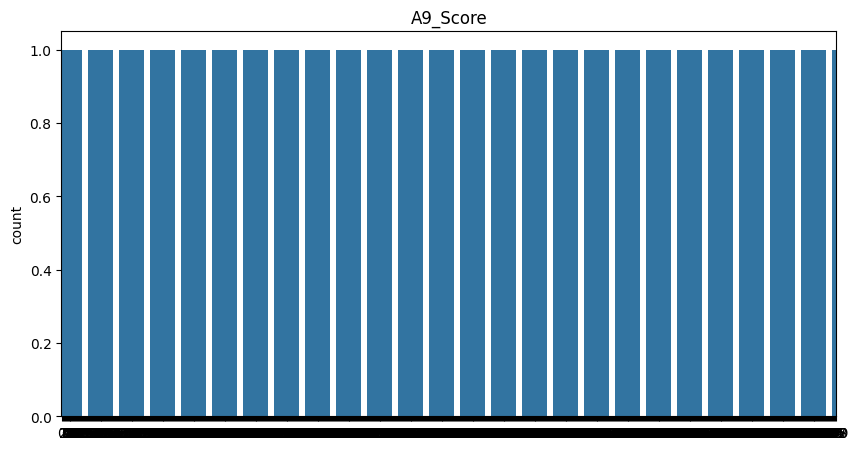

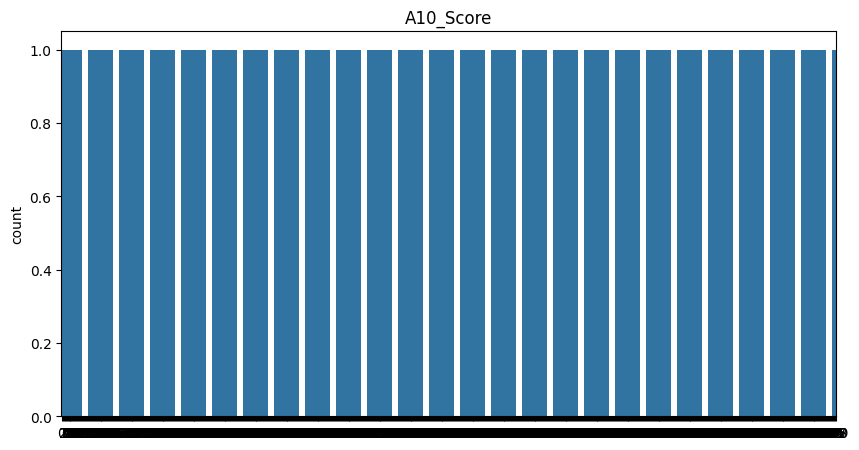

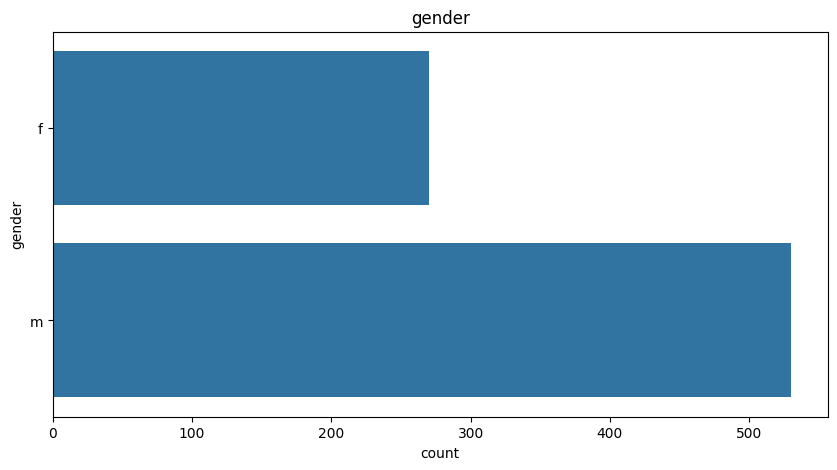

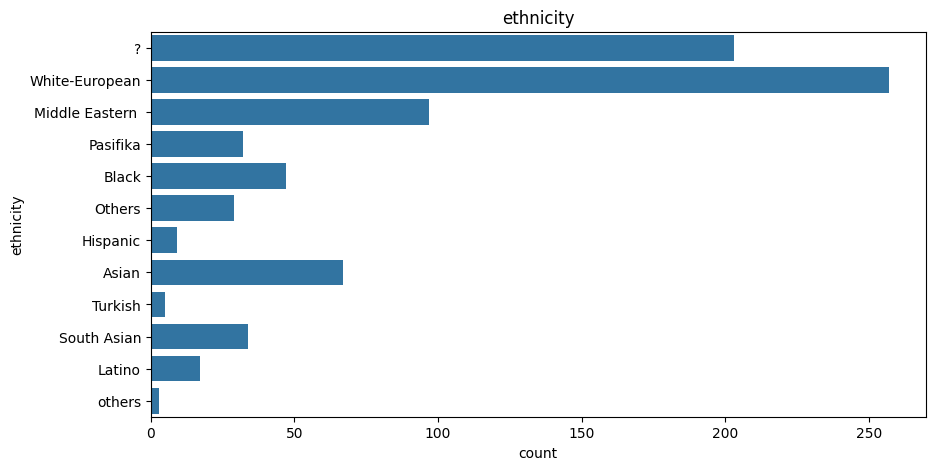

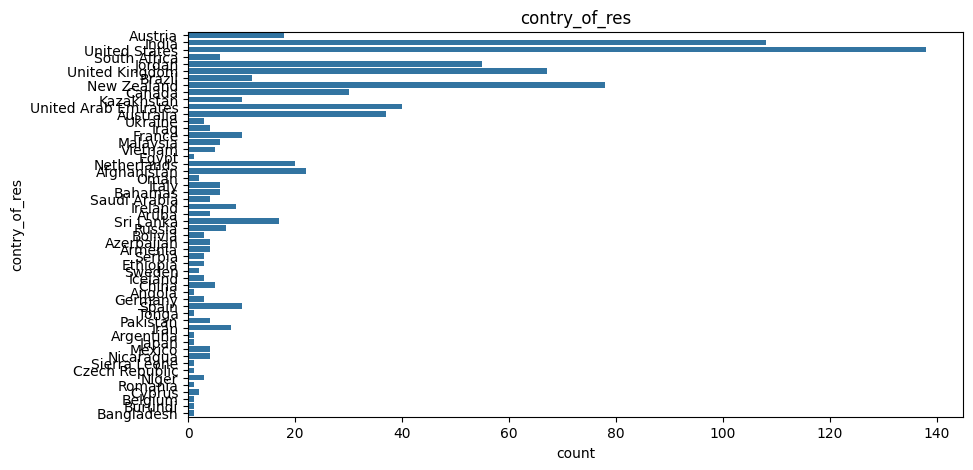

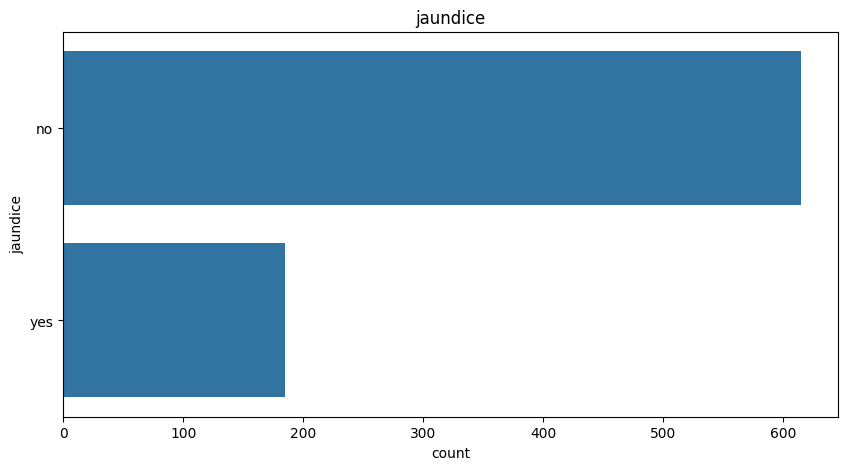

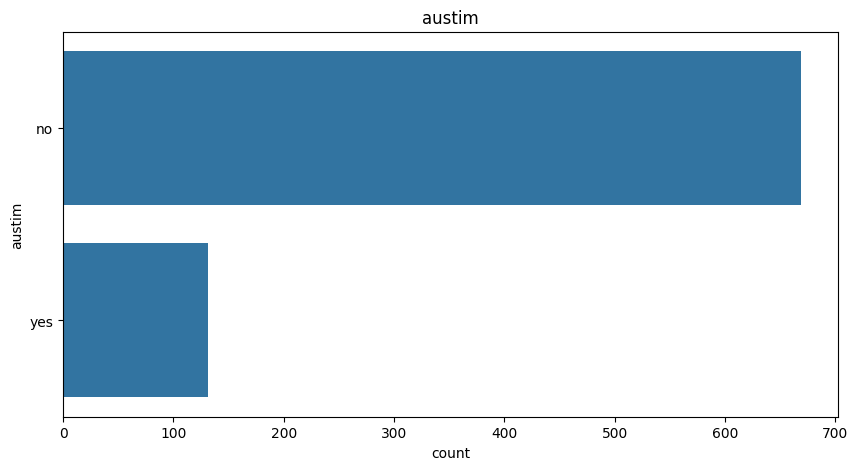

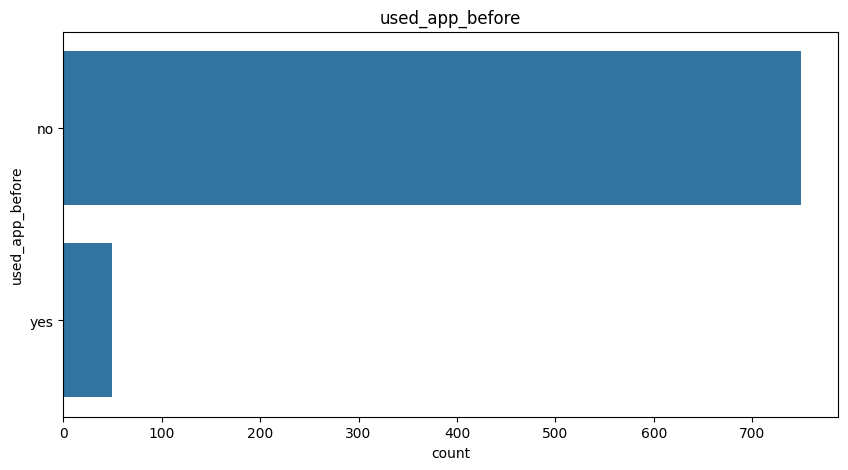

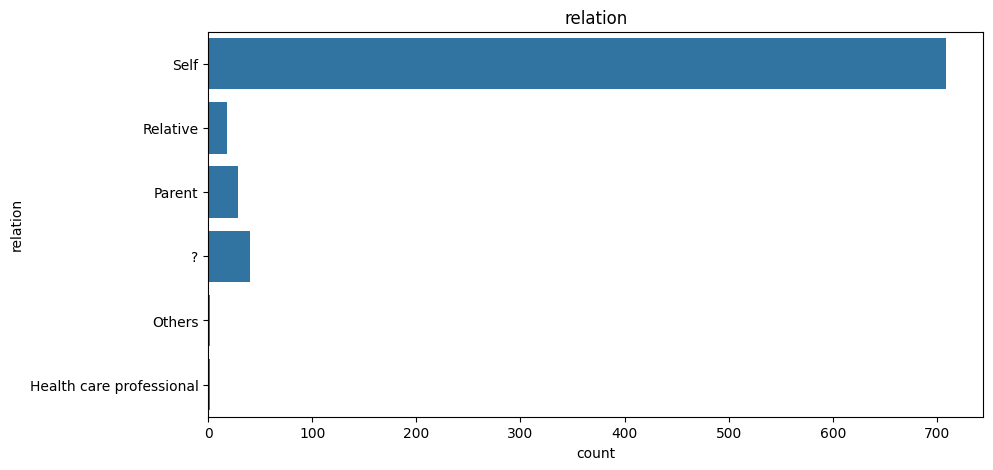

In [79]:
categorical_columns = ['A1_Score','A2_Score','A3_Score','A4_Score','A5_Score','A6_Score','A7_Score','A8_Score','A9_Score','A10_Score','gender','ethnicity','contry_of_res','jaundice','austim','used_app_before','relation']
for col in categorical_columns:
  plt.figure(figsize=(10,5))
  sns.countplot(df[col])
  plt.title(col)
  plt.show()

In [81]:
df['ethnicity'] = df['ethnicity'].replace({'?':'Others','others':'Others'})

In [84]:
df['relation'].unique()

array(['Self', 'Others'], dtype=object)

In [83]:
df['relation'] = df['relation'].replace({'?':'Others','Relative':'Others','Parent':'Others','Health care professional':'Others'})

In [85]:
object_columns = df.select_dtypes(include = 'object').columns

In [86]:
print(object_columns)

Index(['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'relation'],
      dtype='object')


In [87]:
encoders={}

for column in object_columns:
  encoder = LabelEncoder()
  df[column] = encoder.fit_transform(df[column])
  encoders[column] = encoder

  with open(f'{column}_encoder.pkl','wb') as f:
    pickle.dump(encoder,f)

In [88]:
encoders

{'gender': LabelEncoder(),
 'ethnicity': LabelEncoder(),
 'jaundice': LabelEncoder(),
 'austim': LabelEncoder(),
 'contry_of_res': LabelEncoder(),
 'used_app_before': LabelEncoder(),
 'relation': LabelEncoder()}

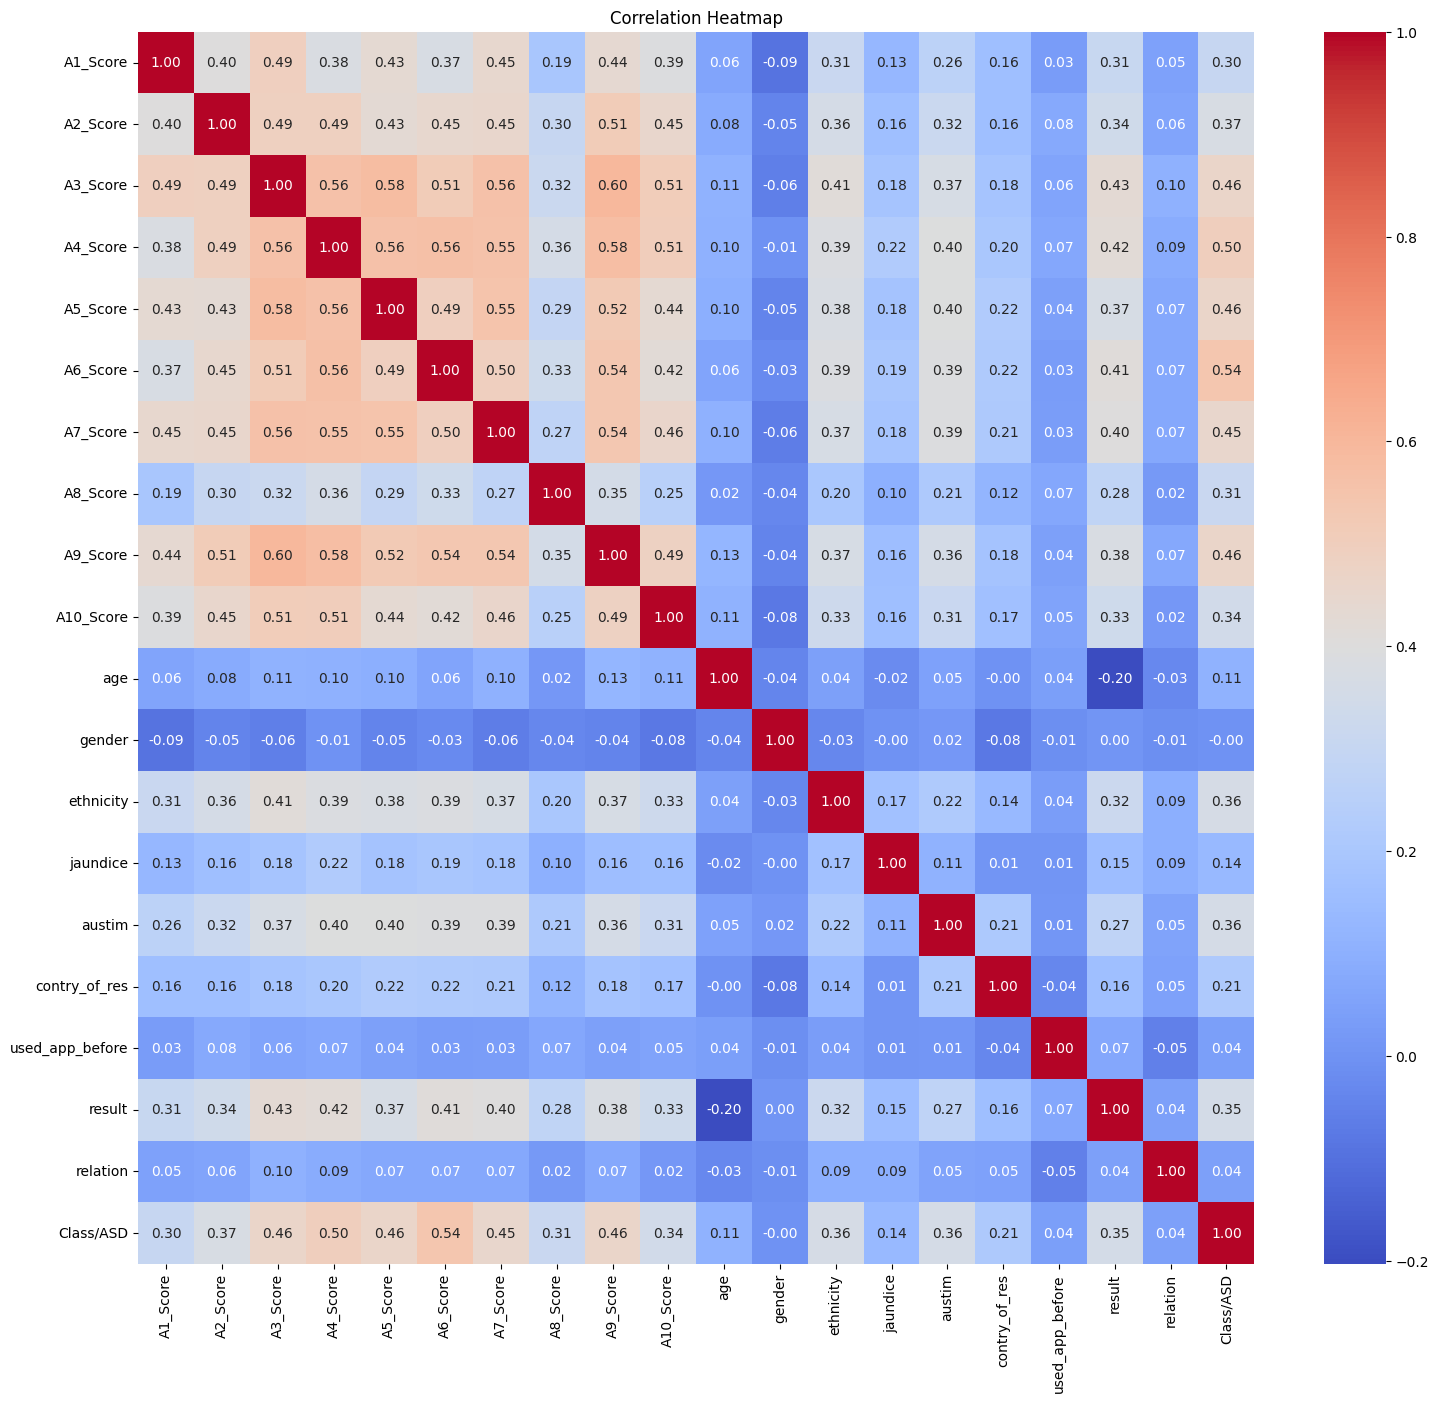

In [90]:
plt.figure(figsize=(18,16))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [102]:
def process_column(df, column_name):

    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Calculate the median
    median = df[column_name].median()

    # Apply the outlier replacement logic
    df[column_name] = df[column_name].apply(lambda x: median if x < lower_bound or x > upper_bound else x)

    return df
df = process_column(df, 'age')
df = process_column(df, 'result')

In [103]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38.0,0,5,0,0,6,0,6.351166,1,0
1,0,0,0,0,0,0,0,0,0,0,47.0,1,5,0,0,23,0,2.255185,1,0
2,1,1,1,1,1,1,1,1,1,1,7.0,1,9,0,1,52,0,14.851484,1,1
3,0,0,0,0,0,0,0,0,0,0,23.0,0,5,0,0,52,0,2.276617,1,0
4,0,0,0,0,0,0,0,0,0,0,43.0,1,5,0,0,44,0,-4.777286,1,0


In [105]:
df.shape

(800, 20)

In [106]:
X = df.drop(columns = ['Class/ASD'])
y = df['Class/ASD']

In [107]:
print(X)

     A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  A8_Score  A9_Score  \
0           1         0         1         0         1         0         1         0         1   
1           0         0         0         0         0         0         0         0         0   
2           1         1         1         1         1         1         1         1         1   
3           0         0         0         0         0         0         0         0         0   
4           0         0         0         0         0         0         0         0         0   
5           1         0         0         0         0         1         0         0         1   
6           1         0         0         0         0         0         1         1         1   
7           1         1         1         1         1         1         1         0         1   
8           1         1         1         1         0         0         0         1         1   
9           0         0       

In [108]:
print(y)

0      0
1      0
2      1
3      0
4      0
5      0
6      0
7      1
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     1
20     1
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     1
29     1
30     1
31     0
32     0
33     0
34     0
35     1
36     0
37     0
38     0
39     0
40     0
41     0
42     1
43     1
44     1
45     0
46     0
47     1
48     0
49     0
50     0
51     0
52     0
53     0
54     0
55     0
56     0
57     0
58     0
59     0
60     0
61     0
62     1
63     0
64     1
65     1
66     0
67     1
68     0
69     0
70     0
71     0
72     0
73     0
74     0
75     1
76     0
77     0
78     0
79     0
80     0
81     0
82     0
83     0
84     1
85     0
86     0
87     0
88     0
89     0
90     0
91     1
92     0
93     0
94     0
95     0
96     0
97     0
98     0
99     0
100    0
101    0
102    0
103    1
104    0
105    0
106    0
107    0
108    0
109    1
110    0
1

In [109]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [110]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [121]:
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state = 42)
}

In [122]:
cv_scores = {}

for model_name, model in models.items():
    print(f'training {model_name} with default paramters')
    scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
    cv_scores[model_name] = scores
    print(f'{model_name} CV accuracy: {scores.mean():.2f}')

training Decision Tree with default paramters
Decision Tree CV accuracy: 0.83
training Random Forest with default paramters
Random Forest CV accuracy: 0.91
training XGBoost with default paramters
XGBoost CV accuracy: 0.90


In [123]:
cv_scores

{'Decision Tree': array([0.7961165 , 0.84466019, 0.84951456, 0.8592233 , 0.81553398]),
 'Random Forest': array([0.90776699, 0.92718447, 0.90776699, 0.91262136, 0.90776699]),
 'XGBoost': array([0.87864078, 0.91262136, 0.89805825, 0.90776699, 0.91262136])}

In [124]:
Decision_Tree =  DecisionTreeClassifier(random_state=42),
Random_Forest = RandomForestClassifier(random_state=42),
XGBoost = XGBClassifier(random_state = 42)

In [129]:
param_grid_dt = {
    'criterion': ['gini','entropy'],
    'max_depth': [None,5,10, 15],
    'min_samples_split': [2,5,10],
    'min_samples_leaf' : [1,2,4]
}

param_grid_rf = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

param_grid_xgb = {
    'n_estimators': [100, 200,300, 500],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0]
}


In [136]:
random_search_dt = RandomizedSearchCV(estimator=Decision_Tree, param_distributions=param_grid_dt, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search_rf = RandomizedSearchCV(estimator=Random_Forest, param_distributions=param_grid_rf, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search_xgb = RandomizedSearchCV(estimator=XGBoost, param_distributions=param_grid_xgb, n_iter=10, cv=5, scoring='accuracy', random_state=42)

In [137]:
random_search_dt.fit(X_train_resampled, y_train_resampled)
random_search_rf.fit(X_train_resampled, y_train_resampled)
random_search_xgb.fit(X_train_resampled, y_train_resampled)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   param_distributions={'colsample_bytree': [0.5, 0.7, 1.0],
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [100, 200, 300, 500],
                                        'subsample': [0.5, 0.7, 1.0]},
                   random_state=42, scoring='accuracy')

In [142]:
best_model = None
best_score = 0

if random_search_dt.best_score_ > best_score:
    best_score = random_search_dt.best_score_
    best_model = random_search_dt.best_estimator_

if random_search_rf.best_score_ > best_score:
    best_score = random_search_rf.best_score_
    best_model = random_search_rf.best_estimator_

if random_search_xgb.best_score_ > best_score:
    best_score = random_search_xgb.best_score_
    best_model = random_search_xgb.best_estimator_

In [143]:
print(f'Best model: {best_model}')
print(f'Best accuracy: {best_score}')


Best model: RandomForestClassifier(bootstrap=False, max_depth=20, min_samples_leaf=2,
                       n_estimators=300, random_state=42)
Best accuracy: 0.916504854368932


In [144]:
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

In [148]:
y_test_pred = best_model.predict(X_test)
print(accuracy_score(y_test,y_test_pred))
print(confusion_matrix(y_test,y_test_pred))
print(classification_report(y_test,y_test_pred))

0.83125
[[108  16]
 [ 11  25]]
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       124
           1       0.61      0.69      0.65        36

    accuracy                           0.83       160
   macro avg       0.76      0.78      0.77       160
weighted avg       0.84      0.83      0.83       160

